In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
mydf = pd.read_csv(r'rainfall_1901_2016_pak.csv')

# head are read first five lines

In [3]:
mydf.head()

,Rainfall - (MM),Year,Month
0,40.4258,1901,January
1,12.3022,1901,February
2,25.5119,1901,March
3,14.2942,1901,April
4,38.3046,1901,May


#tail read last five lines

In [4]:
mydf.tail()

,Rainfall - (MM),Year,Month
1387,60.60610,2016,August
1388,13.76940,2016,September
1389,1.07552,2016,October
1390,2.88480,2016,November
1391,7.82298,2016,December


In [56]:
mydf.describe()

,Rainfall - (MM),Year
count,1392.000000,1392.000000
mean,25.142392,1958.500000
std,22.239632,33.497105
min,0.105840,1901.000000
25%,9.586635,1929.750000
50%,19.653750,1958.500000
75%,33.753075,1987.250000
max,154.055000,2016.000000


In [9]:
print(mydf['Rainfall - (MM)'].value_counts(dropna=False))

40.42580    1
16.62930    1
1.69246     1
14.42930    1
59.16080    1
           ..
19.96890    1
7.81959     1
5.93996     1
33.47400    1
7.82298     1
Name: Rainfall - (MM), Length: 1392, dtype: int64


In [10]:
print(mydf['Rainfall - (MM)'].shape)

(1392,)


In [11]:
print(mydf['Month'].value_counts(dropna=False))
print(mydf['Month'].shape)


January      116
February     116
March        116
April        116
May          116
June         116
July         116
August       116
September    116
October      116
November     116
December     116
Name: Month, dtype: int64
(1392,)


In [14]:
print(mydf[' Year'].shape)
print(mydf[' Year'].value_counts(dropna=False))

(1392,)
1901    12
1974    12
1986    12
1985    12
1984    12
        ..
1935    12
1934    12
1933    12
1932    12
2016    12
Name:  Year, Length: 116, dtype: int64


**Removing missing values**

In [15]:
mydf.isna()

,Rainfall - (MM),Year,Month
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
1387,False,False,False
1388,False,False,False
1389,False,False,False
1390,False,False,False


In [17]:
# creating bool series True for NaN values
bool_series = pd.isnull(mydf['Rainfall - (MM)'])
mydf[bool_series]

,Rainfall - (MM),Year,Month


Text(0, 0.5, 'Rainfall - (MM)')

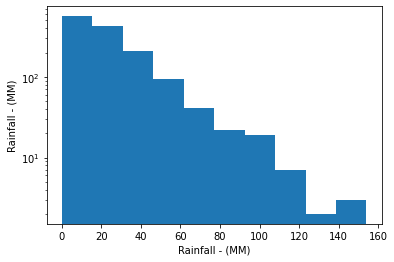

In [18]:
plt.hist(mydf['Rainfall - (MM)'], log=True)
plt.xlabel('Rainfall - (MM)')
plt.ylabel('Rainfall - (MM)')

Text(0, 0.5, 'frequency')

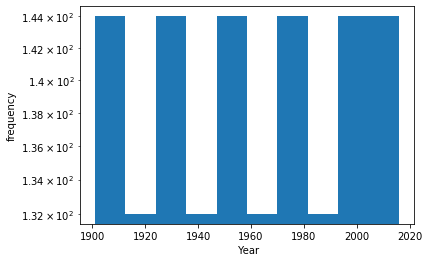

In [20]:
plt.hist(mydf[' Year'], log=True)
plt.xlabel(' Year')
plt.ylabel('frequency')

In [23]:
# Displaying our plot
plt.show()

Text(0.5, 0, ' Year')

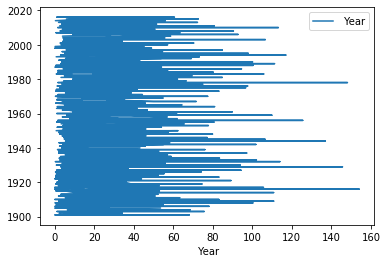

In [34]:
mydf.plot('Rainfall - (MM)', ' Year')
plt.xlabel(' Year')

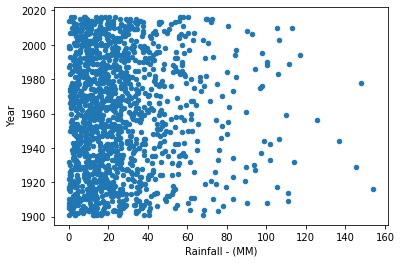

In [110]:
mydf.plot(kind='scatter', x='Rainfall - (MM)', y=' Year')
plt.show()

**Numpy and Pandas Operations**

In [36]:
mydta = np.genfromtxt('rainfall_1901_2016_pak.csv',delimiter=',', skip_header= True,)

In [38]:
Year = mydta[:,1]

In [113]:
print(Year)

[1901. 1901. 1901. ... 2016. 2016. 2016.]


In [112]:
Rainfall = mydta[:,0]

In [39]:
print(Rainfall)

[40.4258  12.3022  25.5119  ...  1.07552  2.8848   7.82298]


In [41]:
print(Rainfall.min())

0.10584


In [42]:
print(Rainfall.max())

154.055


In [55]:
def millimeterTOmeter(Rainfall):
    return (Rainfall/1000)

RainConversion = millimeterTOmeter(Rainfall)
print('Rainfall in meters:')
print(RainConversion)

Rainfall in meters:
[0.0404258  0.0123022  0.0255119  ... 0.00107552 0.0028848  0.00782298]


In [48]:
#Annual Rainfall over the years

In [49]:
Rainmax = Rainfall[(Year >= 1901) & (Year <= 2016)]

In [50]:
Rainmax.mean()

25.142391681034486

In [57]:
mydf.memory_usage()

Index                128
Rainfall - (MM)    11136
 Year              11136
Month              11136
dtype: int64

In [58]:
mydf.value_counts()

Rainfall - (MM)   Year  Month    
0.10584          1917   November     1
27.49750         1955   May          1
27.78050         1963   August       1
27.77690         1924   January      1
27.69090         1905   December     1
                                    ..
12.67500         1984   December     1
12.59370         1963   September    1
12.56740         2001   September    1
12.55840         1921   June         1
154.05500        1916   August       1
Length: 1392, dtype: int64

In [59]:
#droping duplicated values in our dataset
mydf.drop_duplicates()

,Rainfall - (MM),Year,Month
0,40.42580,1901,January
1,12.30220,1901,February
2,25.51190,1901,March
3,14.29420,1901,April
4,38.30460,1901,May
...,...,...,...
1387,60.60610,2016,August
1388,13.76940,2016,September
1389,1.07552,2016,October
1390,2.88480,2016,November


**Matlabplotlib Plotting**

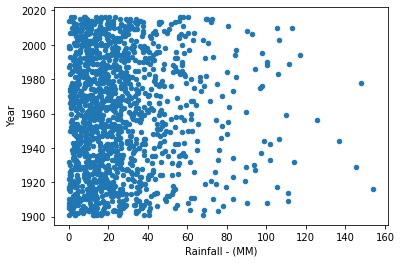

In [114]:
mydf.plot(kind='scatter', x='Rainfall - (MM)', y=' Year')
plt.show()

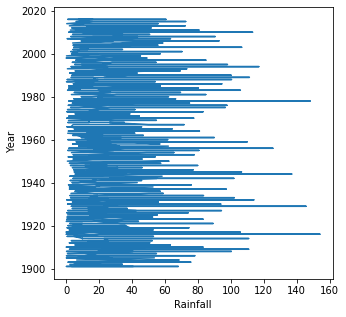

In [65]:
fig, ax = plt.subplots(figsize = (5,5))
plt.xlabel('Rainfall')
plt.ylabel(' Year')
ax.plot(a,b)

**Seaborn plotting**

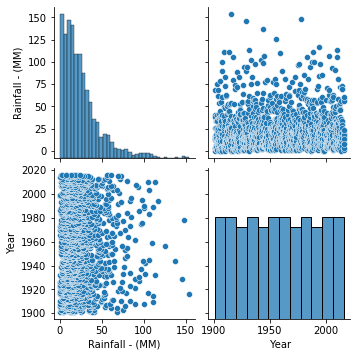

In [67]:
sns.pairplot(mydf)

**Applying Machine Learning Model**

In [ ]:
from sklearn.metrics import mean_squared_error

**Linear Regression**

In [121]:
o,p = np.polyfit(a,b,1)

In [122]:
# Print the slope and intercept
print(o,p)

0.06072619743472159 1956.973198158796


In [123]:
# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = o * x_theor + p

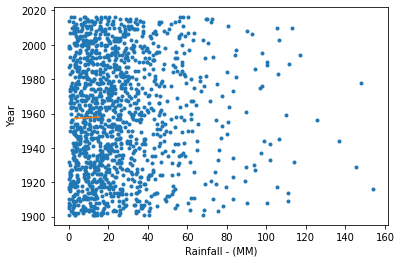

In [124]:
# Plot the Anscombe data and theoretical line
_ = plt.plot(a, b , marker='.', linestyle='none')
_ = plt.plot(x_theor, y_theor)
# Label the axes
plt.xlabel('Rainfall - (MM)')
plt.ylabel(' Year')

# Show the plot
plt.show()

In [97]:
from sklearn.preprocessing import LabelEncoder
print(mydf.isnull().any())
print(mydf.dtypes)

Rainfall - (MM)    False
 Year              False
Month              False
dtype: bool
Rainfall - (MM)    float64
 Year                int64
Month               object
dtype: object


In [99]:
mytargetdta = mydf[' Year']
le_Month = LabelEncoder()
inputs = mydf['Month']
inputs_n = mydf.drop(['Month'],axis='columns')
inputs_n

,Rainfall - (MM),Year
0,40.42580,1901
1,12.30220,1901
2,25.51190,1901
3,14.29420,1901
4,38.30460,1901
...,...,...
1387,60.60610,2016
1388,13.76940,2016
1389,1.07552,2016
1390,2.88480,2016


In [100]:
print(mytargetdta)

0       1901
1       1901
2       1901
3       1901
4       1901
        ... 
1387    2016
1388    2016
1389    2016
1390    2016
1391    2016
Name:  Year, Length: 1392, dtype: int64


In [135]:
from sklearn.neighbors import KNeighborsClassifier
objK= KNeighborsClassifier()

In [137]:
x = mydf.iloc[:, 1]
y = mydf.iloc[:, 2]

In [141]:
x_train, x_test, y_train, y_test = train_test_split(mydf['Rainfall - (MM)'], mydf[' Year'], test_size = 0.2)

In [142]:
objK.fit(np.array(x_train).reshape(-1,1), y_train)

KNeighborsClassifier()

In [143]:
objK.predict

<bound method KNeighborsClassifier.predict of KNeighborsClassifier()>

In [148]:
#This is our Confusion Matrix

In [144]:
from sklearn.metrics import confusion_matrix
y_pred = objK.predict(np.array(x_test).reshape(-1,1))
matrix = confusion_matrix(y_test, y_pred)

In [149]:
print(matrix)

[[0 1 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


Text(24.0, 0.5, 'Values Variation')

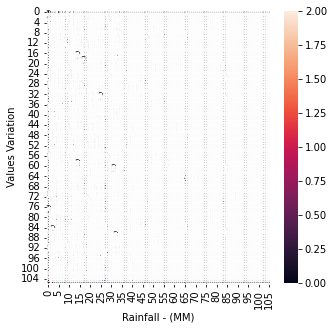

In [147]:
plt.figure(figsize=(5,5))
sns.heatmap(matrix, annot=True)
plt.xlabel('Rainfall - (MM)')
plt.ylabel('Values Variation')